In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import plotly.express as px
import matplotlib
import numpy as np

# path = '/content/drive/MyDrive/데이터분석/2차_프로젝트_lmemdata/5팀_공유폴더/작업결과물/clustering/'

data_2_7 = pd.read_csv(path+'Best_model_Light_gbm.csv', index_col=False)
data_2_7 = data_2_7[['고객번호', 'fluctuation', 
       'A_fluctuation', 'B_fluctuation', 'C_fluctuation', 'D_fluctuation',
       '고급_fluctuation', '일반_fluctuation', '편의_fluctuation',
       '선매_fluctuation', '전문_fluctuation', 'predict']]
data_2_7 = data_2_7.set_index('고객번호')
data_2_7.head()

,fluctuation,A_fluctuation,B_fluctuation,C_fluctuation,D_fluctuation,고급_fluctuation,일반_fluctuation,편의_fluctuation,선매_fluctuation,전문_fluctuation,predict
고객번호,,,,,,,,,,,
1,1.0,1.000,-3.000,4.000,0.001,0.0,1.0,3.0,0.0,0.000,0
2,0.0,0.001,0.001,0.001,0.001,0.0,3.0,3.0,-1.0,1.000,0
3,1.0,0.001,0.001,1.000,0.001,1.0,0.0,0.0,2.0,0.001,0
4,1.0,1.000,-2.000,0.000,0.001,0.0,1.0,2.0,0.0,1.000,0
5,5.0,0.001,0.001,0.001,0.001,6.0,5.0,7.0,5.0,4.000,0


In [ ]:
pd.read_csv(path+'Best_model_Light_gbm.csv', index_col=False)['cagr']

0       -0.064618
1        0.060660
2       -0.053576
3       -0.108319
4       -1.000000
           ...   
19366    0.439559
19367   -0.067320
19368    0.101874
19369    0.095121
19370    1.091467
Name: cagr, Length: 19371, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from datetime import datetime

df = data_2_7.copy()

In [ ]:
df = df[df['predict'] ==0]
df = df.drop('predict', axis=1)
X_features_scaled = MinMaxScaler().fit_transform(df)

##Kmeans

###MinMaxScaler

- MinMaxScaler
- predict 미포함

###시각화

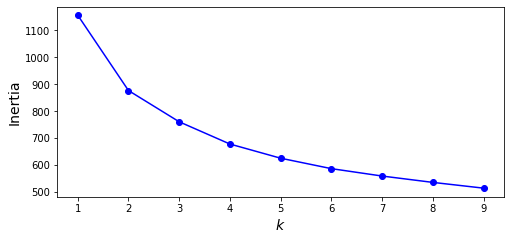

In [ ]:
# kmeans 엘보우 그래프 그리기

r1 = 1   # 몇개  그룹으로 할것인가 여기서부터
r2 = 10  #  여기까지 

kmeans_per_k = [KMeans(n_clusters=k, random_state=42, max_iter=300).fit(X_features_scaled)
                for k in range(r1, r2)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(r1, r2), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.axis([3, 27, 1000, 200000])   # 이거 범위 조절해야 그래프가 보일 수 있음
plt.show()

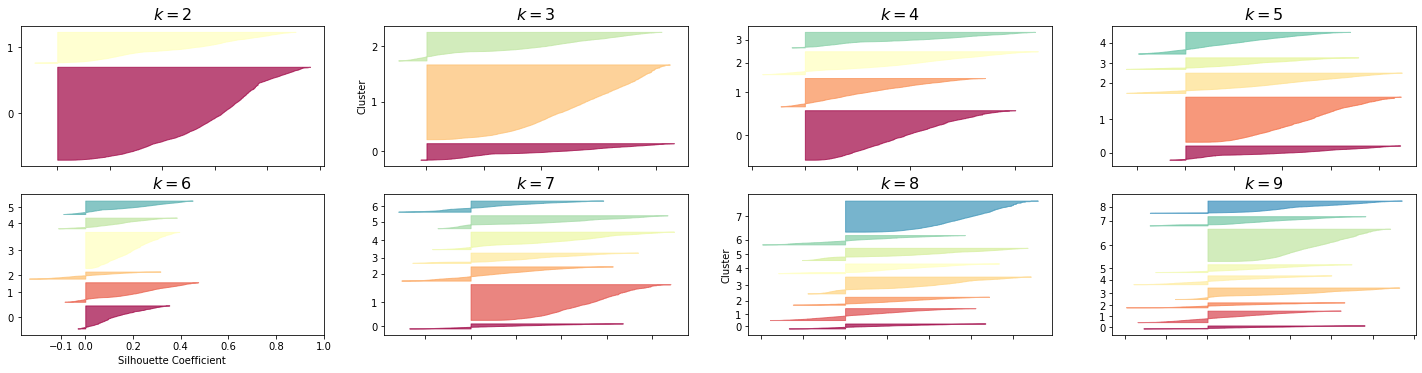

In [ ]:
# kmeans 실루엣 다이어그램

from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.rc('font', family='Malgun Gothic') # For Windows
plt.figure(figsize=(25, 15))

co = 1;
for k in range(2, 10):
    plt.subplot(5, 4, co)
    co +=1
    
    y_pred = kmeans_per_k[k - 1].labels_
    sil_avg = silhouette_score(X_features_scaled, y_pred)
    silhouette_coefficients = silhouette_samples(X_features_scaled, y_pred)

    padding = len(X_features_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = matplotlib.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 8):
        plt.ylabel("Cluster")
    
    if k in (6, 10):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    # plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [ ]:
import sklearn
# 군집화가 잘 되었는지 실루엣 계수로 확인 (1~6분기)
# kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1000,random_state=0)
# labels = kmeans.fit_predict(X_features_scaled)
# df['kmeans_cluster'] = labels
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1000,random_state=0)
labels = kmeans.fit_predict(df)
# pred_zero = data_2_7[data_2_7['predict']==0].drop('predict', axis=1)
pred_zero['kmeans_cluster_by4'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels))) #  전체 데이터의 실루엣 계수 값


labels

실루엣 스코어는 : 0.161


array([3, 3, 3, ..., 0, 3, 0], dtype=int32)

In [ ]:
# 데이터 개별 실루엣계수
sklearn.metrics.silhouette_samples(X_features_scaled,labels)

array([ 0.18061188,  0.18800472,  0.20228532, ...,  0.14436844,
        0.16531533, -0.01556913])

In [ ]:
# kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)
score_samples = sklearn.metrics.silhouette_samples(X_features_scaled,labels)
pred_zero['silhouette_coeff'] = score_samples

pred_zero.groupby('kmeans_cluster_by4')['silhouette_coeff'].mean()

kmeans_cluster_by4
0    0.025048
1    0.275579
2    0.002261
3    0.218476
Name: silhouette_coeff, dtype: float64

실루엣 스코어는 : 0.181


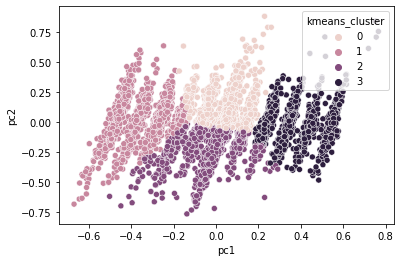

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

data2 = pd.DataFrame(data = pca.fit_transform(X_features_scaled), columns=['pc1', 'pc2', 'pc3','pc4' ])

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1000,random_state=0)
labels = kmeans.fit_predict(data2)
data2['kmeans_cluster'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels))) #  전체 데이터의 실루엣 계수 값

sns.scatterplot(x='pc1', y='pc2', hue='kmeans_cluster', data=data2);

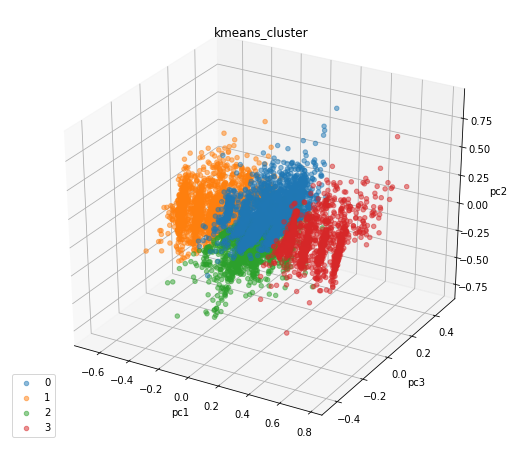

In [ ]:
# 3차원 clustering 시각화
from mpl_toolkits.mplot3d import Axes3D

col_n = 1 
row_n = 2

fig = plt.figure(figsize=(20,8*col_n));

for i, cl in enumerate(['kmeans_cluster']) :
  groups = data2.groupby(cl)

  ax = fig.add_subplot(col_n,row_n,i+1, projection='3d') #int(i/col_n),int(i%col_n);

  # 3차원 scatter 그래프
  for i, group in groups:
    #ax.scatter(user_rfm.iloc[:,0], user_rfm.iloc[:,1], user_rfm.iloc[:,2], alpha = 0.5);
    a = 0
    b = 2
    c = 1
    scatter = ax.scatter(group.iloc[:,a], group.iloc[:,b], group.iloc[:,c], label=i, alpha = 0.5);
    ax.set_xlabel(data2.columns[a]);
    ax.set_ylabel(data2.columns[b]);
    ax.set_zlabel(data2.columns[c]);
  ax.legend(loc = 'lower left')
  ax.set_title(cl);

##군집분석

In [ ]:
df.head()

,fluctuation,A_fluctuation,B_fluctuation,C_fluctuation,D_fluctuation,고급_fluctuation,일반_fluctuation,편의_fluctuation,선매_fluctuation,전문_fluctuation
고객번호,,,,,,,,,,
1,1.0,1.000,-3.000,4.000,0.001,0.0,1.0,3.0,0.0,0.000
2,0.0,0.001,0.001,0.001,0.001,0.0,3.0,3.0,-1.0,1.000
3,1.0,0.001,0.001,1.000,0.001,1.0,0.0,0.0,2.0,0.001
4,1.0,1.000,-2.000,0.000,0.001,0.0,1.0,2.0,0.0,1.000
5,5.0,0.001,0.001,0.001,0.001,6.0,5.0,7.0,5.0,4.000


In [ ]:
pred_zero = data_2_7[data_2_7['predict']==0].drop('predict', axis=1)
pred_zero.shape

(9757, 10)

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1000,random_state=0)
labels = kmeans.fit_predict(df)
pred_zero['kmeans_cluster_by4'] = labels

grouped = pred_zero.groupby('kmeans_cluster_by4').agg(['mean'])
grouped.iloc[:, :5] = grouped.iloc[:, :5].astype('int')
grouped

,fluctuation,A_fluctuation,B_fluctuation,C_fluctuation,D_fluctuation,고급_fluctuation,일반_fluctuation,편의_fluctuation,선매_fluctuation,전문_fluctuation
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
kmeans_cluster_by4,,,,,,,,,,
0,0,0,-1,0,0,0.461267,-1.267848,-1.207089,0.464305,-0.618671
1,1,0,0,0,0,0.934102,0.512356,0.426689,0.635365,3.340472
2,2,0,0,0,0,2.075194,3.501550,3.359690,1.853488,1.139649
3,0,0,0,0,0,0.384715,1.152003,1.126740,0.381503,-0.569739


- 0 (1975명) : B제휴사, 일반, 편의, 전문 상품 구매 감소추세를 보임
- 1 (1821명) : (전체구매액 증감 평균 1) 전문은 확실한 증가이나 고급, 일반, 편의, 선매는 미미한 증가추세를 보임 (증감지수 1 이하)
- 2 (1290명) : (전체구매액 증감 평균 2) 고급, 일반, 편의는 확실한 증가이나 선매와 전문은 비교적 증가추세가 뚜렷하지 않음 (증감지수 선매 1.85 , 전문 1.13)
- 3 (4671명) : 전문 상품이 감소추세를 보임. 선매, 고급이 미미한 증가, 일반과 편의가 1이 넘는 증가지수를 보임.

In [ ]:
pred_zero['kmeans_cluster_by4'].value_counts()

3    4671
0    1975
1    1821
2    1290
Name: kmeans_cluster_by4, dtype: int64

In [ ]:
# pred_zero[['kmeans_cluster_by4']].to_csv('/content/drive/MyDrive/데이터분석/2차_프로젝트_lmemdata/5팀_공유폴더/작업결과물/clustering/kmeans_cluster_by4.csv')